In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Creando un df con diccionario

In [5]:
años=[2023,2022,2022,2020]
calificacion=[80,45,32,21]
diccionario= {"años":años,"calificacion":calificacion}
df=pd.DataFrame(diccionario)
df.head()

,años,calificacion
0,2023,80
1,2022,45
2,2022,32
3,2020,21


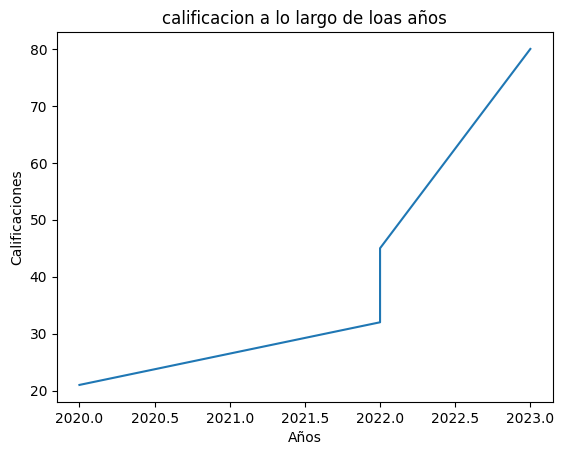

In [7]:
plt.plot("años","calificacion",data=df)
plt.title("calificacion a lo largo de loas años")
plt.xlabel("Años")
plt.ylabel("Calificaciones")
plt.show()

# Cargar informacion apartir de un conjunto de datos

In [10]:
netflix=pd.read_csv("/content/netflix_data.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [11]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [12]:
#Para visualizar la estadistica de las variables numericas utilizamos el metodo describe
netflix.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [13]:
#para visualizar las categorias unicas de un a columna lo hacenos con unique()
netflix["type"].unique()

array(['TV Show', 'Movie'], dtype=object)

# Filtrado de los datos

In [21]:
#netflix[["type","duration"]]

## Ahora que ya conocemos las categorias nos queremos quedar solo con la categoria de Movie

In [17]:
netflix_movies=netflix[netflix["type"]=="Movie"]
netflix_movies["type"].unique()

array(['Movie'], dtype=object)

In [18]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


## Aqui tenempos todas las columnas, pero en este caso solo quiero trabajar con las columnas:


*   ['title', 'country', 'genre', 'release_year', 'duration']



In [20]:
netflix_movies_columns=netflix_movies[['title', 'country', 'genre', 'release_year', 'duration']]
netflix_movies_columns.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


# Creando un scatter plot (grafico de puntos)

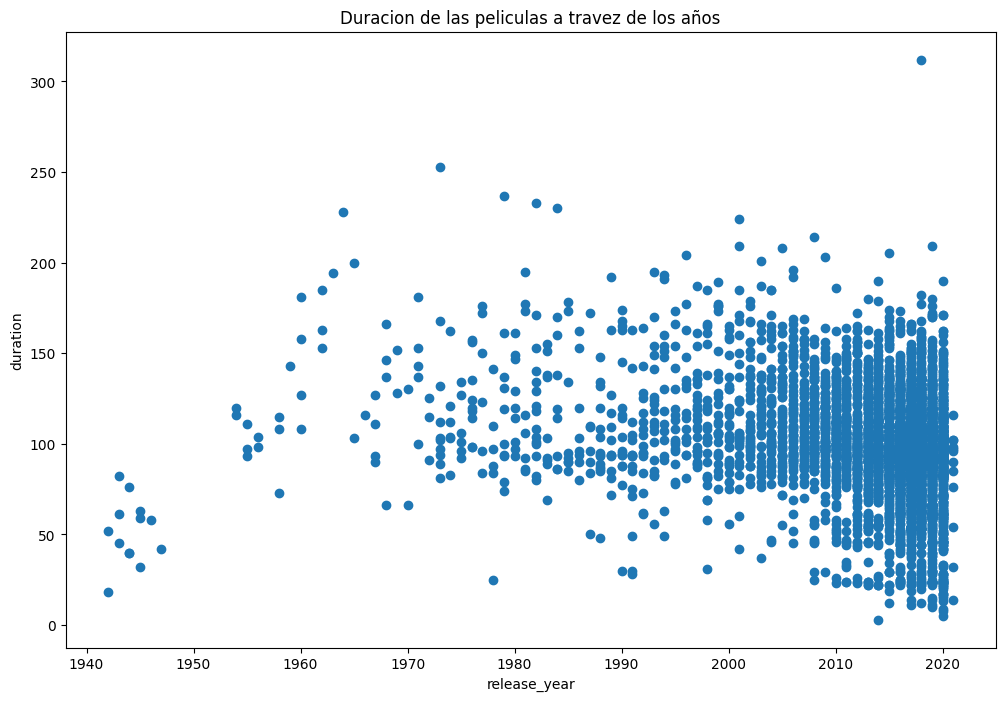

In [27]:
tamaño_grafica=plt.figure(figsize=(12,8))
plt.scatter("release_year","duration",data=netflix_movies_columns)
plt.title("Duracion de las peliculas a travez de los años")
plt.xlabel("release_year")
plt.ylabel("duration")
plt.show()

In [31]:
## Ahora para identificar cuales son esas peliculas que tiene menor duration top3
netflix_movies_columns.nsmallest(n=3,columns="duration")

,title,country,genre,release_year,duration
5605,Silent,United States,Children,2014,3
5694,Sol Levante,Japan,Action,2020,5
1501,Cops and Robbers,United States,Dramas,2020,8


In [32]:
## Ahora para identificar cual es la peliculas que tiene mayor duration
netflix_movies_columns.nlargest(n=1,columns="duration")

,title,country,genre,release_year,duration
957,Black Mirror: Bandersnatch,United States,Dramas,2018,312


#Viasualizamos el conteo de la categorica genre
*  Queremos obtener el top3 de categoria

In [33]:
netflix_movies_columns["genre"].value_counts()

genre
Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
Children                 502
Stand-Up                 321
Horror Movies            244
International Movies     114
Classic Movies            77
Uncategorized             56
Thrillers                 49
Independent Movies        20
Anime Features            19
Music                     17
Cult Movies               12
Sci-Fi                    11
Romantic Movies            3
Sports Movies              1
LGBTQ Movies               1
Name: count, dtype: int64

In [36]:
# Filtramos para obtener top 3 de categorias
netflix_movies_columns_filtered=netflix_movies_columns[
    (netflix_movies_columns["genre"]=="Dramas")|
    (netflix_movies_columns["genre"]=="Comedies")|
    (netflix_movies_columns["genre"]=="Documentaries")
]
netflix_movies_columns_filtered["genre"].value_counts()

genre
Dramas           1384
Comedies         1074
Documentaries     751
Name: count, dtype: int64

In [41]:
netflix_movies_columns_filtered.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
4,21,United States,Dramas,2008,123
7,187,United States,Dramas,1997,119
10,1922,United States,Dramas,2017,103
13,"2,215",Thailand,Documentaries,2018,89


In [40]:
#Ahora vamos a crear una lista con los colores de cada categoria
for lab,row in netflix_movies_columns_filtered.iterrows():
  print(lab)
  print(row)
  break

1
title             7:19
country         Mexico
genre           Dramas
release_year      2016
duration            93
Name: 1, dtype: object


In [42]:
colors=[]
#Ahora vamos a crear una lista con los colores de cada categoria
for lab,row in netflix_movies_columns_filtered.iterrows():
  if row["genre"]=="Dramas":
    colors.append("Red")
  elif row["genre"]=="Comedies":
    colors.append("Blue")
  elif row["genre"]=="Documentaries":
    colors.append("Black")
colors[:10]

['Red', 'Red', 'Red', 'Red', 'Black', 'Red', 'Red', 'Blue', 'Red', 'Red']

In [44]:
netflix_movies_columns_filtered.columns

Index(['title', 'country', 'genre', 'release_year', 'duration'], dtype='object')

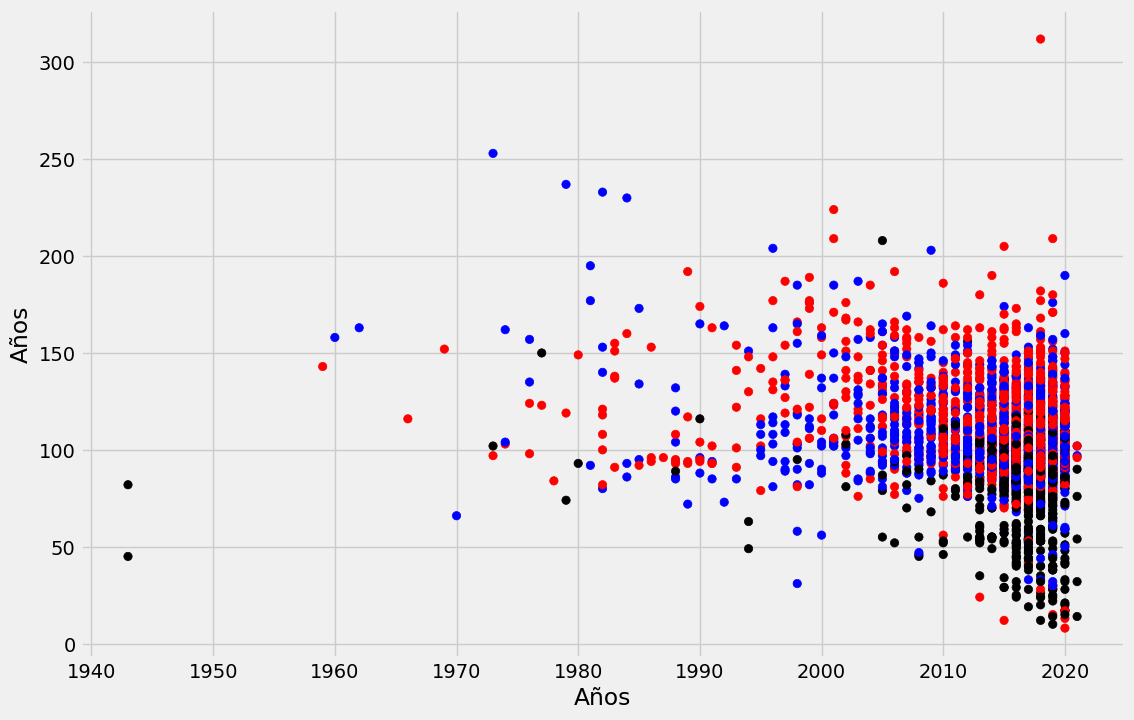

In [48]:
#Ahora creamos una lista con los colores lo cual lo pasaremos como agmumento a color de scatter plot

plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(12,8))
plt.scatter("release_year","duration",data=netflix_movies_columns_filtered,color=colors)
plt.xlabel("Años")
plt.ylabel("Años")
plt.show()

In [50]:
#Creamos una grafica de barra con la categoria genero con el index
count_movies=netflix_movies_columns["genre"].value_counts()
count_movies

genre
Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
Children                 502
Stand-Up                 321
Horror Movies            244
International Movies     114
Classic Movies            77
Uncategorized             56
Thrillers                 49
Independent Movies        20
Anime Features            19
Music                     17
Cult Movies               12
Sci-Fi                    11
Romantic Movies            3
Sports Movies              1
LGBTQ Movies               1
Name: count, dtype: int64

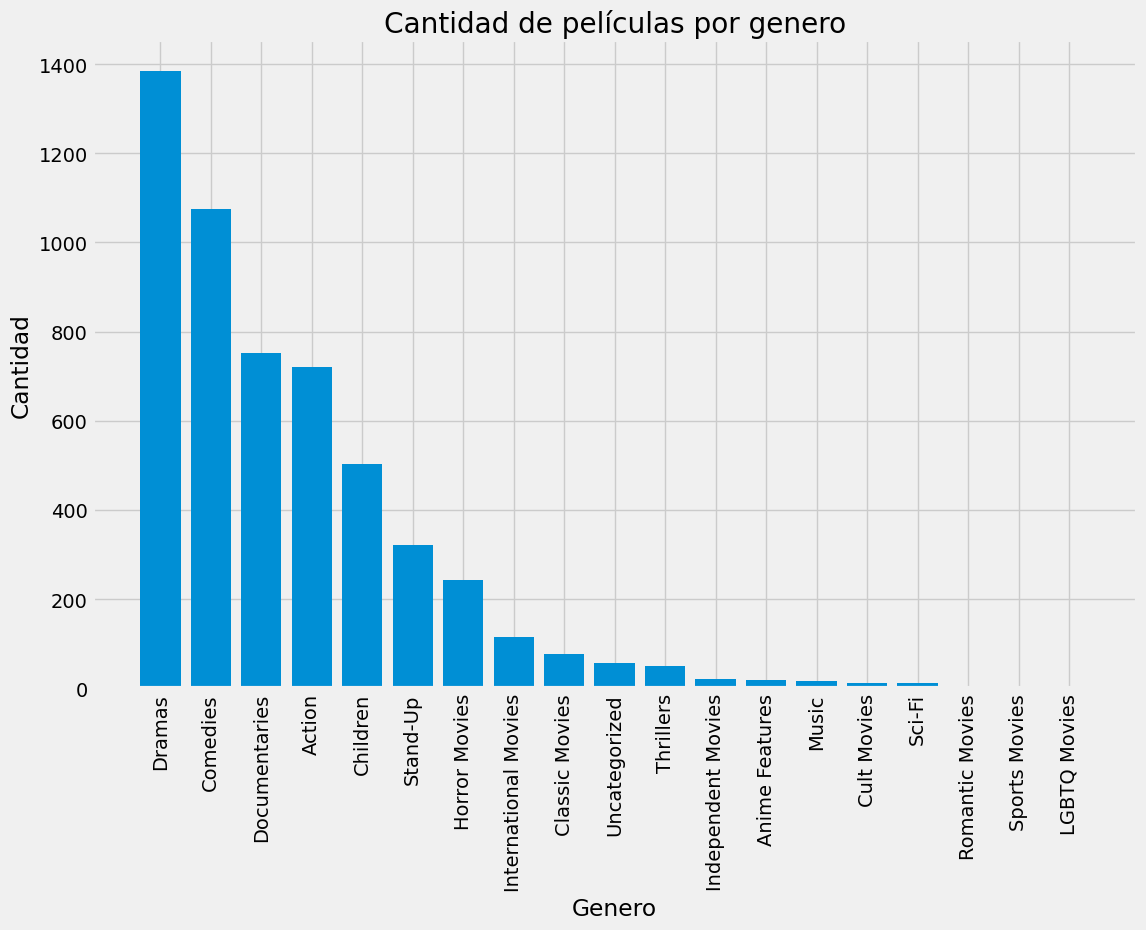

In [58]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(12,8))
plt.bar(count_movies.index,count_movies.values)
plt.title('Cantidad de películas por genero')
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

In [63]:
duracion_promedio_movies=netflix_movies_columns.groupby("release_year")["duration"].mean().reset_index()
duracion_promedio_movies

,release_year,duration
0,1942,35.000000
1,1943,62.666667
2,1944,52.000000
3,1945,51.333333
4,1946,58.000000
...,...,...
67,2017,94.836022
68,2018,96.170300
69,2019,93.457045
70,2020,89.795620


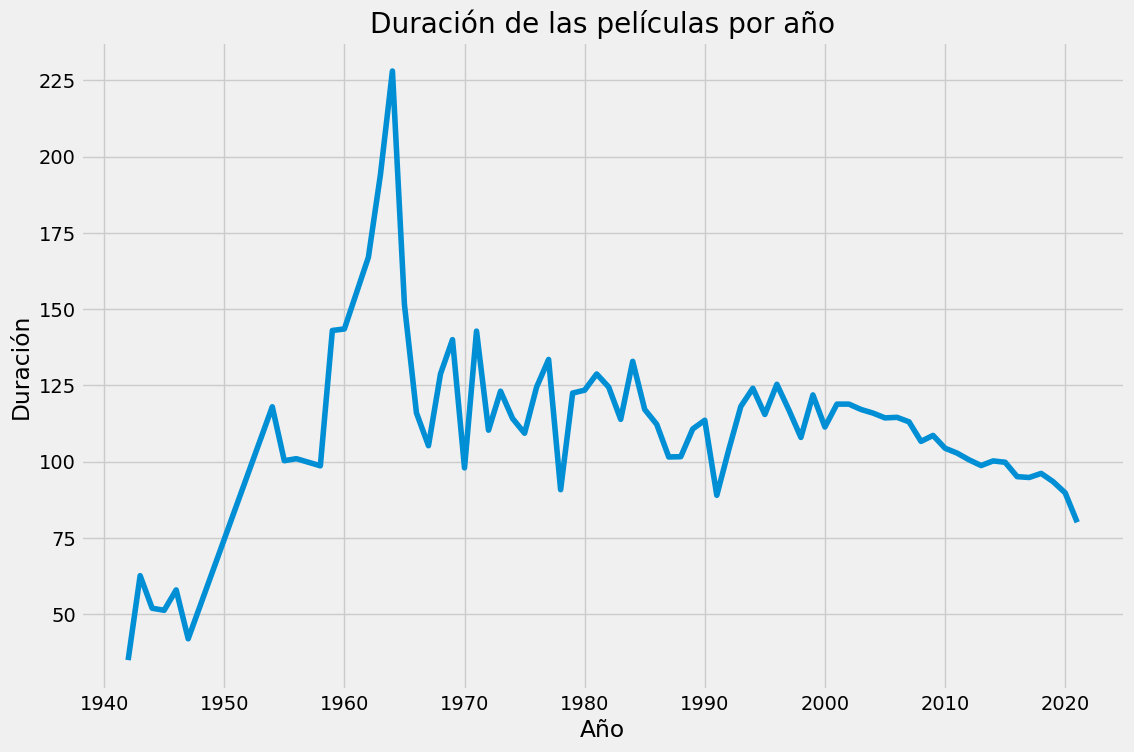

In [64]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
plt.plot('release_year', 'duration', data=duracion_promedio_movies)
plt.title('Duración de las películas por año')
plt.xlabel('Año')
plt.ylabel('Duración')
plt.show()

In [66]:
netflix_movies_country = netflix_movies_columns['country'].value_counts().head(10)
netflix_movies_country.head()

country
United States     2100
India              883
United Kingdom     341
Canada             175
France             137
Name: count, dtype: int64

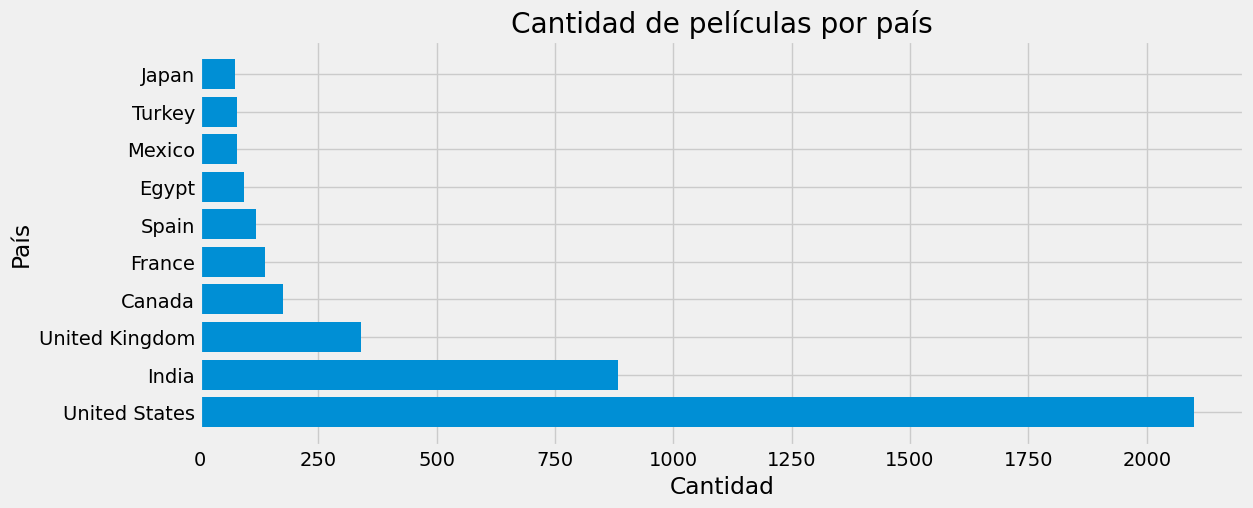

In [67]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,5))
plt.barh(netflix_movies_country.index, netflix_movies_country.values)
plt.title('Cantidad de películas por país')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.show()